In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from env import YoutubeEnv
from agents import Agent, get_regret

In [2]:
nb_simus = 100

In [3]:
def show_(rewards, bestActionSim, title):
    
    regrets = np.zeros(rewards.shape)
    
    for idx, r in enumerate(rewards):
        regret, _ = get_regret(r, *bestActionSim)
        regrets[idx, :] = regret
        
    mean_regret = np.mean(regrets, axis=0)
    q_005 = np.quantile(regrets, 0.05, axis=0)
    q_095 = np.quantile(regrets, 0.95, axis=0)

    plt.xlabel = "Time"
    plt.ylabel = "Cumulative regret"
    times = np.arange(len(mean_regret))
    plt.plot(times, mean_regret, "bo", label="Mean regret", markersize=1)
    plt.plot(times, q_005, "ro", markersize=1)
    plt.plot(times, q_095, "ro", markersize=1)
    plt.legend()
    plt.title(title)
    plt.show()

# Experiments in the non-evolutive case

In [4]:
env = YoutubeEnv.random_env(seed=0)
users = list(env.users.values())
u = users[0]
agent = Agent(u, env)

thompson_rewards = []
thompson_actions = []

greedy_rewards = []
greedy_actions = []

q_rewards = []
q_actions = []

for simu_id in tqdm(range(1, nb_simus + 1)):
    
    env.reset(simu_id)
    actions, rewards = agent.thompson_sim(500, prior = 'beta')
    thompson_actions.append(actions)
    thompson_rewards.append(rewards)
    
    env.reset(simu_id)
    actions, rewards = agent.eps_greedy_sim(500)
    greedy_actions.append(actions)
    greedy_rewards.append(rewards)
    
    env.reset(simu_id)
    actions, rewards = agent.qlearning_sim(500, alpha = 0.7, gamma = 0.4, epsilon = 0.3)
    q_actions.append(actions)
    q_rewards.append(rewards)

    bestActionSim = agent.get_best_action_sim()

C:\Users\popaulou\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


cumRegret with cosine similarity Thompson : 


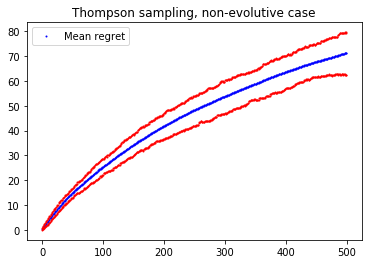

In [5]:
print("cumRegret with cosine similarity Thompson : ")
rewards = np.array(thompson_rewards)
show_(rewards, bestActionSim, "Thompson sampling, non-evolutive case")

cumRegret with cosine similarity Epsilon Greedy : 


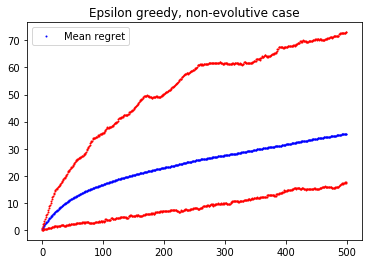

In [6]:
print("cumRegret with cosine similarity Epsilon Greedy : ")
rewards = np.array(greedy_rewards)
show_(rewards, bestActionSim, "Epsilon greedy, non-evolutive case")

cumRegret with cosine similarity qlearning : 


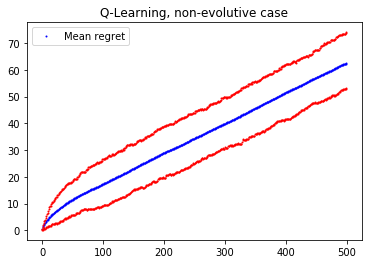

In [7]:
print("cumRegret with cosine similarity qlearning : ")
rewards = np.array(q_rewards)
show_(rewards, bestActionSim, "Q-Learning, non-evolutive case")

# Experiments in the evolutive case

In [8]:
env = YoutubeEnv.random_env(evolutive=True, seed=0)
users = list(env.users.values())
u = users[0]
agent = Agent(u, env)

thompson_rewards = []
thompson_actions = []

greedy_rewards = []
greedy_actions = []

q_rewards = []
q_actions = []

for simu_id in tqdm(range(1, nb_simus + 1)):
    
    env.reset(simu_id)
    actions, rewards = agent.thompson_sim(500, prior = 'beta')
    thompson_actions.append(actions)
    thompson_rewards.append(rewards)
    
    env.reset(simu_id)
    actions, rewards = agent.eps_greedy_sim(500)
    greedy_actions.append(actions)
    greedy_rewards.append(rewards)
    
    env.reset(simu_id)
    actions, rewards = agent.qlearning_sim(500, alpha = 0.7, gamma = 0.4, epsilon = 0.3)
    q_actions.append(actions)
    q_rewards.append(rewards)

    bestActionSim = agent.get_best_action_sim()

C:\Users\popaulou\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


cumRegret with cosine similarity Thompson : 


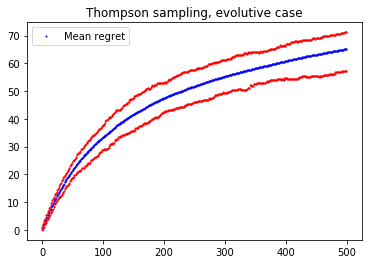

In [9]:
print("cumRegret with cosine similarity Thompson : ")
rewards = np.array(thompson_rewards)
show_(rewards, bestActionSim, "Thompson sampling, evolutive case")

cumRegret with cosine similarity Epsilon Greedy : 


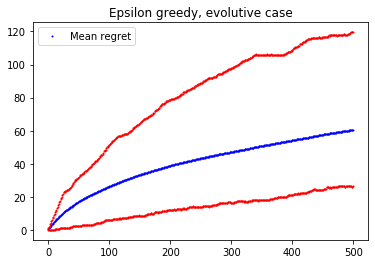

In [10]:
print("cumRegret with cosine similarity Epsilon Greedy : ")
rewards = np.array(greedy_rewards)
show_(rewards, bestActionSim, "Epsilon greedy, evolutive case")

cumRegret with cosine similarity qlearning : 


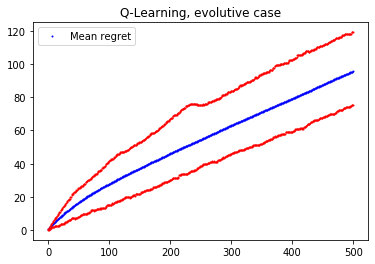

In [11]:
print("cumRegret with cosine similarity qlearning : ")
rewards = np.array(q_rewards)
show_(rewards, bestActionSim, "Q-Learning, evolutive case")